In [2]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## D.Sapalidis, Empa, Center for X-ray Analytics, St. Gallen, Switzerland, 30.06.2024 ##

## Part I: Excel sheets separation from the single .xlsx raw data from ZetaSizer to .csv files ##

import os
import pandas as pd
import pathlib
import matplotlib.pyplot as plt


def excel_to_csv_folder(input_folder, output_folder):
    
    files = os.listdir(input_folder)
    
    
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
    
    # Loop through each Excel file
    for excel_file in excel_files:
        
        excel_path = os.path.join(input_folder, excel_file)
        
        
        xls = pd.ExcelFile(excel_path)
        
        # Loop through each sheet and convert to CSV
        for sheet_name in xls.sheet_names:
            
            df = pd.read_excel(excel_path, sheet_name=sheet_name)
            
            csv_filename = f"PhD-Empa-MetrINo-DLS-{sheet_name}.csv"
            
            output_csv_file = os.path.join(output_folder, csv_filename)
            
            df.to_csv(output_csv_file, index=False)
            
            print(f"Converted sheet '{sheet_name}' from '{excel_file}' to CSV: {output_csv_file}")
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User Defined Paths:
input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"
output_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()
output_folder = pathlib.PureWindowsPath(output_folder).as_posix()

excel_to_csv_folder(input_folder, output_folder)


Converted sheet 'A1H1_FBS_All_no_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-A1H1_FBS_All_no_Correlogram.csv
Converted sheet 'B2H1_FBS_All_no_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-B2H1_FBS_All_no_Correlogram.csv
Converted sheet 'A1H1_FBS_All_son_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\PhD-Empa-MetrINo-DLS-A1H1_FBS_All_son_Correlogram.csv
Converted sheet 'B2H1_FBS_All_son_Correlogram' from 'D.Sapalidis-PhD-Empa-MetrINo-Metr28-DLS-UCNPs-FBS-Correlogram.xlsx' to CSV: C:/Users/Di

In [3]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 02.07.2024 ##

## Part II: Data sets generation for each angle and sample ##

import os
import pandas as pd
import pathlib

def process_dls_file(file_path, angles):

    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    num_columns_per_angle = 2 * angles
    
    dataset_index = 1
    
    # Loop through the dataframe and split it based on the number of angles
    for start_col in range(0, df.shape[1], num_columns_per_angle):
        
        # Select a subset of columns
        subset_df = df.iloc[:, start_col:start_col + num_columns_per_angle]
        
        # Extract the sample name from the first column header
        full_header = df.columns[start_col]
        sample_name = full_header.split('Time (µs) -')[-1].split('[Steady state]')[0].strip()
        
        # Output file name
        output_file_name = f"{sample_name}_dataset.txt"
        output_file_path = os.path.join(os.path.dirname(file_path), output_file_name)
        
        # Save to a .txt file
        subset_df.to_csv(output_file_path, index=False, sep=',')
        print(f"Saved: {output_file_path}")
        
        dataset_index += 1

def process_dls_folder(folder_path, angles):

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            process_dls_file(file_path, angles)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined number of angles and paths
angles = 3  # For multi-angle DLS >1

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_FBS_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_dls_folder(input_folder, angles)


Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_5_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_25_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_125_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_0625_no_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_5_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_25_son_dataset.txt
Saved: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Data/DLS Data/Fitting/UCNPs_FBS_Fitting_DLS\A1H1_FBS_0_125_son_dataset.txt
Saved: C

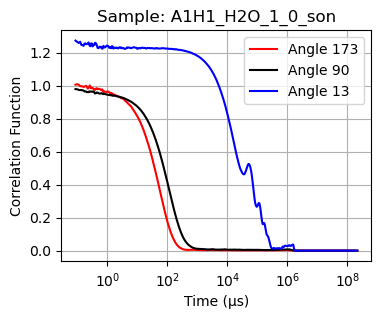

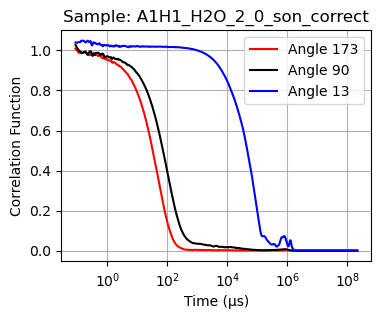

In [4]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.0) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 02.07.2024 ##

## Part III: Plotting all the angles of each sample into a single graph ##

import os
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

def plot_dls_data_from_txt(file_path, angles, angle_values):
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    sample_name = os.path.basename(file_path).replace('_dataset.txt', '')
    
    colors = ['red', 'black', 'blue', 'green', 'orange', 'purple', 'yellow', 'gray']
    
    # Create a plot for the sample
    plt.figure(figsize=(4, 3))  
    
    for i in range(angles):
        time_col = df.columns[2 * i]
        corr_col = df.columns[2 * i + 1]
        
        plt.semilogx(df[time_col], df[corr_col], label=f'Angle {angle_values[i]}', color=colors[i])
    
    plt.title(f'Sample: {sample_name}')
    plt.xlabel('Time (µs)')
    plt.ylabel('Correlation Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def process_plots_folder(folder_path, angles, angle_values):

    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            plot_dls_data_from_txt(file_path, angles, angle_values)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined number of angles and paths
angles = 3  
angle_1 = 173
angle_2 = 90
angle_3 = 13
angle_values = [angle_1, angle_2, angle_3]

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_H2O_Fitting_DLS"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()

process_plots_folder(input_folder, angles, angle_values)

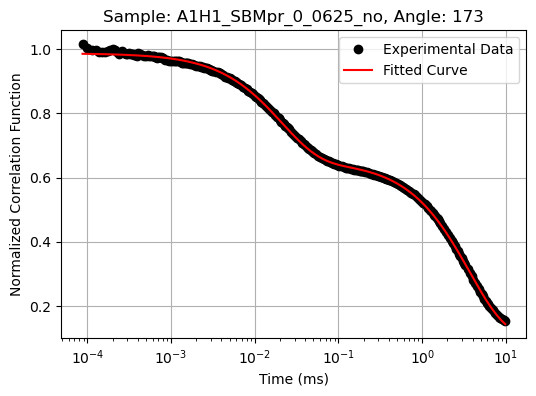

Sample A1H1_SBMpr_0_0625_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.105±0.003, A1: 0.739±0.002, Γ1: 0.135±0.002, A2: 0.2005±0.0006, Γ2: 44.1±0.4
Diffusion Coefficient 1: 0.000194±0.000002 μm2/ms
Diffusion Coefficient 2: 0.0632±0.0006 μm2/ms
Hydrodynamic Diameter 1: (2.54±0.03)×10³ nm
Hydrodynamic Diameter 2: 7.78±0.07 nm


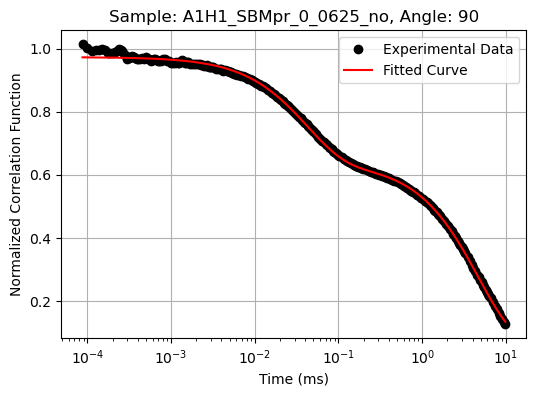

Sample A1H1_SBMpr_0_0625_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.062±0.007, A1: 0.759±0.004, Γ1: 0.106±0.002, A2: 0.196±0.001, Γ2: 22.1±0.3
Diffusion Coefficient 1: 0.000303±0.000007 μm2/ms
Diffusion Coefficient 2: 0.0633±0.0009 μm2/ms
Hydrodynamic Diameter 1: (1.62±0.04)×10³ nm
Hydrodynamic Diameter 2: 7.8±0.1 nm


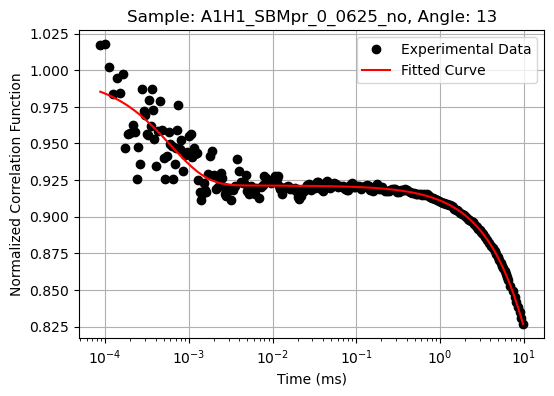

Sample A1H1_SBMpr_0_0625_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0±1, A1: 0.8±0.7, Γ1: 0.01±0.01, A2: 0.04±0.03, Γ2: (1.6±0.2)×10³
Diffusion Coefficient 1: 0.001±0.001 μm2/ms
Diffusion Coefficient 2: (1.8±0.2)×10² μm2/ms
Hydrodynamic Diameter 1: (1±1)×10³ nm
Hydrodynamic Diameter 2: 0.0027±0.0003 nm


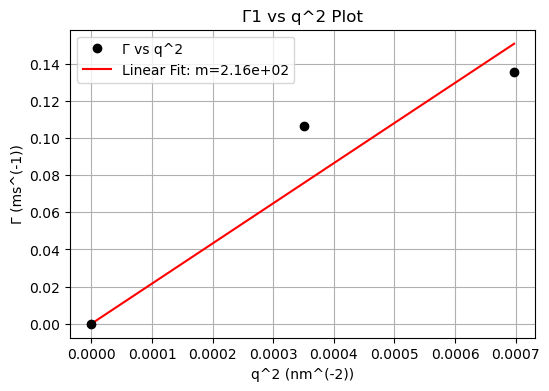

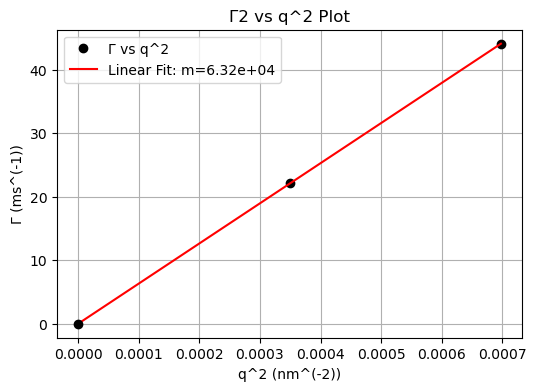


Averaged Results for angles [90, 173]:
Average Diffusion Coefficient 1: 0.000249±0.000004 μm2/ms
Average Diffusion Coefficient 2: 0.0633±0.0005 μm2/ms
Average Hydrodynamic Diameter 1: (2.08±0.02)×10³ nm
Average Hydrodynamic Diameter 2: 7.78±0.06 nm


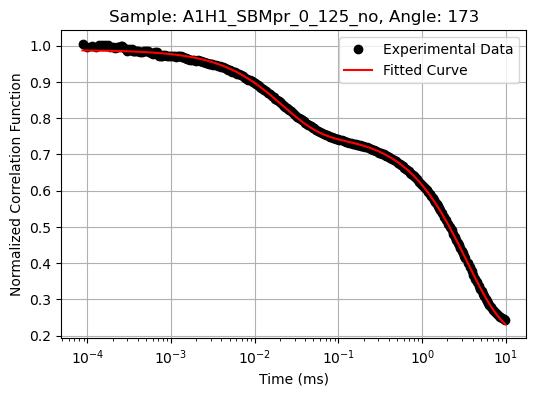

Sample A1H1_SBMpr_0_125_no
Angle 173:
q^2: 0.0006975668562837355
Β-1: 0.200±0.003, A1: 0.745±0.002, Γ1: 0.145±0.002, A2: 0.1426±0.0006, Γ2: 45.1±0.6
Diffusion Coefficient 1: 0.000208±0.000002 μm2/ms
Diffusion Coefficient 2: 0.0647±0.0008 μm2/ms
Hydrodynamic Diameter 1: (2.36±0.03)×10³ nm
Hydrodynamic Diameter 2: 7.61±0.09 nm


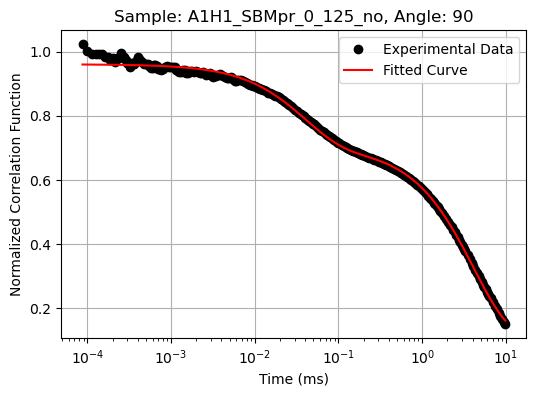

Sample A1H1_SBMpr_0_125_no
Angle 90:
q^2: 0.0003500881802457264
Β-1: 0.107±0.008, A1: 0.771±0.005, Γ1: 0.121±0.003, A2: 0.152±0.001, Γ2: 24.0±0.6
Diffusion Coefficient 1: 0.00035±0.00001 μm2/ms
Diffusion Coefficient 2: 0.068±0.002 μm2/ms
Hydrodynamic Diameter 1: (1.42±0.04)×10³ nm
Hydrodynamic Diameter 2: 7.2±0.2 nm


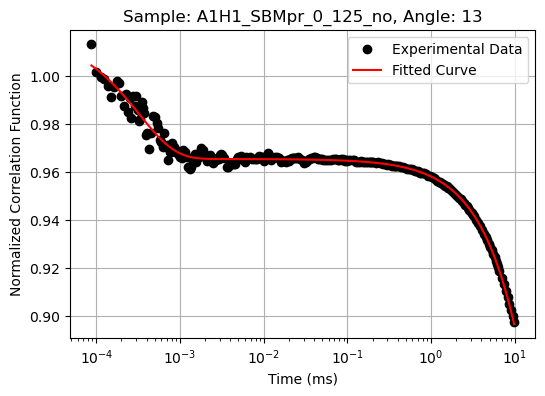

Sample A1H1_SBMpr_0_125_no
Angle 13:
q^2: 8.97273737915286e-06
Β-1: 0.2±0.6, A1: 0.9±0.3, Γ1: 0.005±0.004, A2: 0.03±0.01, Γ2: (3.1±0.1)×10³
Diffusion Coefficient 1: 0.0005±0.0004 μm2/ms
Diffusion Coefficient 2: (3.4±0.1)×10² μm2/ms
Hydrodynamic Diameter 1: (9±7)×10² nm
Hydrodynamic Diameter 2: 0.00144±0.00005 nm


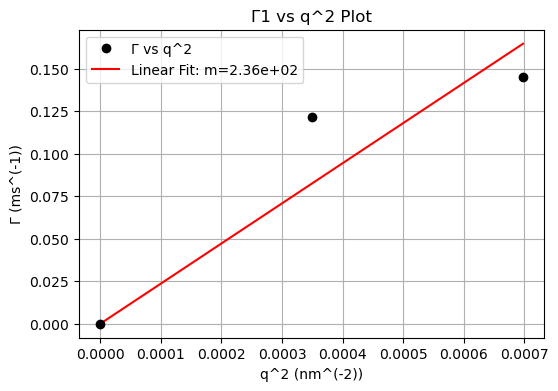

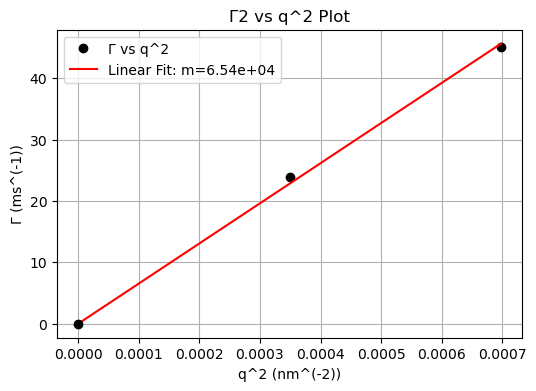


Averaged Results for angles [90, 173]:
Average Diffusion Coefficient 1: 0.000277±0.000005 μm2/ms
Average Diffusion Coefficient 2: 0.067±0.001 μm2/ms
Average Hydrodynamic Diameter 1: (1.89±0.02)×10³ nm
Average Hydrodynamic Diameter 2: 7.4±0.1 nm
{'Sample': 'A1H1_SBMpr_0_0625_no', 'Angle': 173, 'q^2 (Γ1)': 0.0006975668562837355, 'q^2 (Γ2)': 0.0006975668562837355, 'B-1': 0.10492785755553026, 'Δ(B-1)': 0.0030317616672826085, 'A1': 0.7387355489925369, 'Δ(A1)': 0.0018939520976628441, 'Γ1': 0.13542577517463208, 'Δ(Γ1)': 0.0016342621877220298, 'A2': 0.20052578226615828, 'Δ(A2)': 0.0006117852624574321, 'Γ2': 44.11911785678592, 'Δ(Γ2)': 0.39031206688922804, 'Diffusion Coefficient 1': 0.00019414020886271524, 'Δ(Diffusion Coefficient 1)': 2.3428036653411373e-06, 'Diffusion Coefficient 2': 0.06324715324324477, 'Δ(Diffusion Coefficient 2)': 0.0005595335606519535, 'Hydrodynamic Diameter 1': 2535.068048581608, 'Δ(Hydrodynamic Diameter 1)': 30.59215167686376, 'Hydrodynamic Diameter 2': 7.7815145061156

In [14]:
## Dynamic Light Scattering ##

## Data Analysis Process (Version 2.2) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 06.07.2024 ##


import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *

# Function to normalize Y-axis
def normalize_y(df):
    for col in df.columns[1::2]:  # Every second column starting from index 1
        mean_first_six = df[col].iloc[:6].mean()
        df[col] = df[col] / mean_first_six
    return df

# Function to convert X-axis to milliseconds
def convert_to_milliseconds(df):
    for col in df.columns[::2]:  # Every second column starting from index 0
        df[col] = df[col] / 1000
    return df

# Cumulants fitting function
def cumulantDLS(xdata, a, b, c, d):
    return a + b * (np.exp(-c * xdata) * (1 + 0.5 * d * xdata**2))**2  # Alastair G. Mailer et al 2015 J. Phys.: Condens. Matter 27 145102 - Equation 13

# Biexponential fitting function
def biexponential(xdata, e, f, g, h, i):
    return e + (f * np.exp(-g * xdata) + h * np.exp(-i * xdata))**2

# Diffusion coefficient
def calculate_diffusion_coefficient_and_uncertainty(x2, x2_err, angle):
    q_sq = (((4 * np.pi * refr_Index / lambda_val) * np.sin((angle * np.pi / 180) / 2))**2)  # q_square in nm^(-1)
    diff_coeff = 10**(-6) * x2 / q_sq  # diffusion coefficient in  μm^(2) / ms
    diff_coeff_err = 10**(-6) * x2_err / q_sq
    return diff_coeff, diff_coeff_err, q_sq

# Hydrodynamic diameter
def calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err):
    d_h = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity * diff_coeff)  # d_h in nm
    d_h_err = (10**9 * 10**9 * k_Boltzman * Temp_K) / (3 * np.pi * viscosity) * (diff_coeff_err / diff_coeff**2)
    return d_h, d_h_err

# Format numbers with uncertainties to one significant digit
def format_with_uncertainty(value, error):
    u_val = ufloat(value, error)
    return f"{u_val:.1uP}"

# Print results
def print_results(results_list):
    for result in results_list:
        print(result)
        print()

# Function to select fitting range based on time (ms)
def select_fitting_range(xdata, ydata, fitting_range):
    if not fitting_range:
        return xdata, ydata
    start_time, end_time = fitting_range
    mask = (xdata >= start_time) & (xdata <= end_time)
    return xdata[mask], ydata[mask]

# Function to save fitting data for each sample and angle
def save_fitting_data_to_file(input_folder, sample_name, angle, xdata, ydata, F_fit, residuals):
    output_file = os.path.join(input_folder, f"{sample_name}_angle_{angle}_output_fit.txt")
    with open(output_file, 'w') as f:
        f.write("Time (ms),Experimental g(2)-1,Fitting g(2)-1,Residuals\n")
        for t, y_exp, y_fit, res in zip(xdata, ydata, F_fit, residuals):
            f.write(f"{t},{y_exp},{y_fit},{res}\n")

# Fitting of the data
def process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel, fitting_range, save_fitting_data):
    results_list = []
    
    df = pd.read_csv(file_path, delimiter=',', header=0, nrows=None)
    
    df_normalized = normalize_y(df)
    
    df_normalized_ms = convert_to_milliseconds(df_normalized)
    
    # Initialize arrays to store fitting results
    F_fit = np.zeros((angles, len(df_normalized)))
    X_fit = np.zeros((angles, len(df_normalized), 5 if fitmodel == 2 else 4))
    Residuals = np.zeros((angles, len(df_normalized)))
    Errors = np.zeros((angles, 5 if fitmodel == 2 else 4))  # To store uncertainties
    
    # Initialize lists to store results for selected angles
    diff_coeff1_list = []
    diff_coeff1_err_list = []
    diff_coeff2_list = []
    diff_coeff2_err_list = []
    d_h1_list = []
    d_h1_err_list = []
    d_h2_list = []
    d_h2_err_list = []
    pdi_list = []
    pdi_err_list = []
    
    gamma1_values = []
    gamma2_values = []
    q_square_values1 = []
    q_square_values2 = []
    
    sample_name = os.path.basename(file_path).replace("_dataset.txt", "")
    
    # Perform fitting for each angle
    for idx in range(angles):
        xdata = df_normalized_ms.iloc[:, 2 * idx].values
        ydata = df_normalized_ms.iloc[:, 2 * idx + 1].values
        
        # Selection of the fitting range
        xdata, ydata = select_fitting_range(xdata, ydata, fitting_range)
        
        try:
            if fitmodel == 1:
                # Cumulants fitting
                x0_g = [0.0, 1.0, 1.0, 0.1]  # Initial guesses for fitting parameters
                boundaries = ([-0.2, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0])  # Limits for the parameters
                x, cov = curve_fit(cumulantDLS, xdata, ydata, p0=x0_g, bounds=boundaries)
                errors = np.sqrt(np.diag(cov))
                F_fit[idx, :len(xdata)] = cumulantDLS(xdata, *x)
                
                # Calculate PDI
                pdi = x[3] / (x[2]**2)
                pdi_err = errors[3] / (x[2]**2)
                
                Residuals[idx, :len(xdata)] = ydata - F_fit[idx, :len(xdata)]
                X_fit[idx] = x
                Errors[idx] = errors
                chi_square = np.sum(((ydata - F_fit[idx, :len(xdata)]) ** 2) / F_fit[idx, :len(xdata)])
                reduced_chi_square = chi_square / (len(ydata) - len(x))

                # Store results if the angle is in the angles_for_average list
                if angle_values[idx] in angles_for_average:
                    diff_coeff, diff_coeff_err, q_sq = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
                    gamma1_values.append(x[2])
                    q_square_values1.append(q_sq)
                    hydrodynamic_diameter, hydrodynamic_diameter_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff, diff_coeff_err)
                    diff_coeff1_list.append(ufloat(diff_coeff, diff_coeff_err))
                    d_h1_list.append(ufloat(hydrodynamic_diameter, hydrodynamic_diameter_err))
                    pdi_list.append(pdi)
                    pdi_err_list.append(pdi_err)
                
                results_list.append({
                    "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                    "Angle": angle_values[idx],
                    "q^2": q_sq,
                    "B-1": x[0],
                    "Δ(Β-1)": errors[0],
                    "β": x[1],
                    "Δ(β)": errors[1],
                    "Γ": x[2],
                    "Δ(Γ)": errors[2],
                    "PDI": pdi,
                    "Δ(PDI)": pdi_err,
                    "Diffusion Coefficient": diff_coeff,
                    "Δ(Diffusion Coefficient)": diff_coeff_err,
                    "Hydrodynamic Diameter": hydrodynamic_diameter,
                    "Δ(Hydrodynamic Diameter)": hydrodynamic_diameter_err,
                    "χ^2": chi_square,
                    "Reduced χ^2": reduced_chi_square
                })
                
            elif fitmodel == 2:
                # Biexponential fitting
                x0_g = [0.0, 0.5, 1.0, 0.5, 1.0]  # Initial guesses for fitting parameters
                boundaries = ([-0.2, 0.0, 0.0, 0.0, 0.0], [0.2, 1.0, np.inf, 1.0, np.inf])  # Limits for the parameters
                x, cov = curve_fit(biexponential, xdata, ydata, p0=x0_g, bounds=boundaries)
                errors = np.sqrt(np.diag(cov))
                F_fit[idx, :len(xdata)] = biexponential(xdata, *x)
                
                # Ensure Γ2 > Γ1
                if x[4] <= x[2]:
                    x[2], x[4] = x[4], x[2]
                    x[1], x[3] = x[3], x[1]
                    errors[2], errors[4] = errors[4], errors[2]
                    errors[1], errors[3] = errors[3], errors[1]

                Residuals[idx, :len(xdata)] = ydata - F_fit[idx, :len(xdata)]
                X_fit[idx] = x
                Errors[idx] = errors
                chi_square = np.sum(((ydata - F_fit[idx, :len(xdata)]) ** 2) / F_fit[idx, :len(xdata)])
                reduced_chi_square = chi_square / (len(ydata) - len(x))
                
                # Calculation of diffusion coefficients for biexponential
                diff_coeff1, diff_coeff1_err, q_sq1 = calculate_diffusion_coefficient_and_uncertainty(x[2], errors[2], angle_values[idx])
                diff_coeff2, diff_coeff2_err, q_sq2 = calculate_diffusion_coefficient_and_uncertainty(x[4], errors[4], angle_values[idx])
                gamma1_values.append(x[2])
                gamma2_values.append(x[4])
                q_square_values1.append(q_sq1)
                q_square_values2.append(q_sq2)
                hydrodynamic_diameter1, hydrodynamic_diameter1_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff1, diff_coeff1_err)
                hydrodynamic_diameter2, hydrodynamic_diameter2_err = calculate_hydrodynamic_diameter_and_uncertainty(diff_coeff2, diff_coeff2_err)
                
                # Store results if the angle is in the angles_for_average list
                if angle_values[idx] in angles_for_average:
                    diff_coeff1_list.append(ufloat(diff_coeff1, diff_coeff1_err))
                    diff_coeff2_list.append(ufloat(diff_coeff2, diff_coeff2_err))
                    d_h1_list.append(ufloat(hydrodynamic_diameter1, hydrodynamic_diameter1_err))
                    d_h2_list.append(ufloat(hydrodynamic_diameter2, hydrodynamic_diameter2_err))
                
                results_list.append({
                    "Sample": os.path.basename(file_path).replace("_dataset.txt", ""),
                    "Angle": angle_values[idx],
                    "q^2 (Γ1)": q_sq1,
                    "q^2 (Γ2)": q_sq2,
                    "B-1": x[0],
                    "Δ(B-1)": errors[0],
                    "A1": x[1],
                    "Δ(A1)": errors[1],
                    "Γ1": x[2],
                    "Δ(Γ1)": errors[2],
                    "A2": x[3],
                    "Δ(A2)": errors[3],
                    "Γ2": x[4],
                    "Δ(Γ2)": errors[4],
                    "Diffusion Coefficient 1": diff_coeff1,
                    "Δ(Diffusion Coefficient 1)": diff_coeff1_err,
                    "Diffusion Coefficient 2": diff_coeff2,
                    "Δ(Diffusion Coefficient 2)": diff_coeff2_err,
                    "Hydrodynamic Diameter 1": hydrodynamic_diameter1,
                    "Δ(Hydrodynamic Diameter 1)": hydrodynamic_diameter1_err,
                    "Hydrodynamic Diameter 2": hydrodynamic_diameter2,
                    "Δ(Hydrodynamic Diameter 2)": hydrodynamic_diameter2_err,
                    "χ^2": chi_square,
                    "Reduced χ^2": reduced_chi_square
                })
        
        except RuntimeError as e:
            print(f"RuntimeError for file {file_path} at angle {angle_values[idx]}: {e}")
            continue  # Continue with the next angle

        # Save fitting data to file if requested
        if save_fitting_data.lower() == "yes":
            save_fitting_data_to_file(os.getcwd(), sample_name, angle_values[idx], xdata, ydata, F_fit[idx, :len(xdata)], Residuals[idx, :len(xdata)])

        # Plot experimental and fitted curves
        plt.figure(figsize=(6, 4))
        plt.semilogx(xdata, ydata, 'ko', label='Experimental Data')
        plt.semilogx(xdata, F_fit[idx, :len(xdata)], 'r-', label='Fitted Curve')
        plt.title(f'Sample: {os.path.basename(file_path).replace("_dataset.txt", "")}, Angle: {angle_values[idx]}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Normalized Correlation Function')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print fitting parameters with uncertainties
        print(f'Sample {os.path.basename(file_path).replace("_dataset.txt", "")}')
        print(f"Angle {angle_values[idx]}:")
        print(f"q^2: {q_sq1 if fitmodel == 2 else q_sq}")
        
        if fitmodel == 1:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, β: {format_with_uncertainty(x[1], errors[1])}, Γ: {format_with_uncertainty(x[2], errors[2])}, PDI: {format_with_uncertainty(pdi, pdi_err)}")
            print(f"Diffusion Coefficient: {format_with_uncertainty(diff_coeff, diff_coeff_err)} μm2/ms")
            print(f"Hydrodynamic Diameter: {format_with_uncertainty(hydrodynamic_diameter, hydrodynamic_diameter_err)} nm")
        elif fitmodel == 2:
            print(f"Β-1: {format_with_uncertainty(x[0], errors[0])}, A1: {format_with_uncertainty(x[1], errors[1])}, Γ1: {format_with_uncertainty(x[2], errors[2])}, A2: {format_with_uncertainty(x[3], errors[3])}, Γ2: {format_with_uncertainty(x[4], errors[4])}")
            print(f"Diffusion Coefficient 1: {format_with_uncertainty(diff_coeff1, diff_coeff1_err)} μm2/ms")
            print(f"Diffusion Coefficient 2: {format_with_uncertainty(diff_coeff2, diff_coeff2_err)} μm2/ms")
            print(f"Hydrodynamic Diameter 1: {format_with_uncertainty(hydrodynamic_diameter1, hydrodynamic_diameter1_err)} nm")
            print(f"Hydrodynamic Diameter 2: {format_with_uncertainty(hydrodynamic_diameter2, hydrodynamic_diameter2_err)} nm")
    
    # Plot Γ1 vs q^2 for selected angles
    if diff_coeff1_list and d_h1_list:
        plot_gamma_vs_q_square(gamma1_values, q_square_values1, angles_for_average, 'Γ1 vs q^2 Plot')
    
    # Plot Γ2 vs q^2 for selected angles if model is biexponential
    if fitmodel == 2 and diff_coeff2_list and d_h2_list:
        plot_gamma_vs_q_square(gamma2_values, q_square_values2, angles_for_average, 'Γ2 vs q^2 Plot')
    
    # Calculate averages
    avg_results = {}
    if diff_coeff1_list and d_h1_list and (fitmodel == 1 or diff_coeff2_list):
        avg_diff_coeff1 = np.mean(diff_coeff1_list)
        avg_diff_coeff2 = np.mean(diff_coeff2_list) if diff_coeff2_list else None
        avg_d_h1 = np.mean(d_h1_list)
        avg_d_h2 = np.mean(d_h2_list) if d_h2_list else None
        avg_pdi = np.mean(pdi_list) if pdi_list else None
        avg_pdi_err = np.sqrt(np.sum([err**2 for err in pdi_err_list])) / len(pdi_err_list) if pdi_err_list else None
        
        avg_results = {
            "Sample": sample_name,
            "Average Diffusion Coefficient 1": avg_diff_coeff1.nominal_value,
            "Δ(Average Diffusion Coefficient 1)": avg_diff_coeff1.std_dev,
            "Average Diffusion Coefficient 2": avg_diff_coeff2.nominal_value if avg_diff_coeff2 else "",
            "Δ(Average Diffusion Coefficient 2)": avg_diff_coeff2.std_dev if avg_diff_coeff2 else "",
            "Average Hydrodynamic Diameter 1": avg_d_h1.nominal_value,
            "Δ(Average Hydrodynamic Diameter 1)": avg_d_h1.std_dev,
            "Average Hydrodynamic Diameter 2": avg_d_h2.nominal_value if avg_d_h2 else "",
            "Δ(Average Hydrodynamic Diameter 2)": avg_d_h2.std_dev if avg_d_h2 else "",
            "Average PDI": avg_pdi if avg_pdi else "",
            "Δ(Average PDI)": avg_pdi_err if avg_pdi_err else ""
        }
        
        print(f"\nAveraged Results for angles {angles_for_average}:")
        print(f"Average Diffusion Coefficient 1: {avg_diff_coeff1:.1uP} μm2/ms")
        if avg_diff_coeff2:
            print(f"Average Diffusion Coefficient 2: {avg_diff_coeff2:.1uP} μm2/ms")
        print(f"Average Hydrodynamic Diameter 1: {avg_d_h1:.1uP} nm")
        if avg_d_h2:
            print(f"Average Hydrodynamic Diameter 2: {avg_d_h2:.1uP} nm")
        if avg_pdi:
            print(f"Average PDI: {ufloat(avg_pdi, avg_pdi_err):.1uP}")
    
    return results_list, avg_results, F_fit, X_fit, Residuals, Errors, gamma1_values, gamma2_values, q_square_values1, q_square_values2

# Plot Γ vs q^2 with linear fitting passing through (0,0)
def plot_gamma_vs_q_square(gamma_values, q_square_values, angles_for_average, plot_title):
    angles_indices = [i for i, angle in enumerate(angle_values) if angle in angles_for_average and i < len(q_square_values) and i < len(gamma_values)]
    q_square_values_selected = np.array([q_square_values[idx] for idx in angles_indices])
    gamma_values_selected = np.array([gamma_values[idx] for idx in angles_indices])
    
    def linear_fit_through_origin(x, m):
        return m * x
    
    popt, _ = curve_fit(linear_fit_through_origin, q_square_values_selected, gamma_values_selected)
    
    # Plot data and linear fit 
    plt.figure(figsize=(6, 4))
    plt.plot(q_square_values_selected, gamma_values_selected, 'ko', label='Γ vs q^2')
    
    # Calculate the y-values of the linear fit at q^2 = 0 and q^2 = max(q_square_values_selected)
    y_fit_at_zero = linear_fit_through_origin(0, *popt)
    y_fit_at_max = linear_fit_through_origin(max(q_square_values_selected), *popt)

    plt.plot([0, max(q_square_values_selected)], [y_fit_at_zero, y_fit_at_max], 'r-', label=f'Linear Fit: m={popt[0]:.2e}')  # Linear fit through (0,0)
    plt.plot([0], [0], 'ko')  # Plot (0,0) point 
    
    plt.xlabel('q^2 (nm^(-2))')
    plt.ylabel('Γ (ms^(-1))')
    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Conversion of Greek characters to English
greek_to_english = {
    "\u0393": "Gamma",
    "\u0394": "Delta",
    "\u03b2": "Beta",
    "\u03c7": "Chi"
}

def convert_greek_to_english(results_list):
    converted_results = []
    for entry in results_list:
        converted_entry = {}
        for key, value in entry.items():
            converted_key = "".join(greek_to_english.get(char, char) for char in key)
            converted_entry[converted_key] = value
        converted_results.append(converted_entry)
    return converted_results

# Save fitting data to file
def save_fitting_data_to_file(input_folder, sample_name, angle, xdata, ydata, F_fit, residuals):
    output_file = os.path.join(input_folder, f"{sample_name}_angle_{angle}_output_fit.txt")
    with open(output_file, 'w') as f:
        f.write("Time (ms),Experimental g(2)-1,Fitting g(2)-1,Residuals\n")
        for t, y_exp, y_fit, res in zip(xdata, ydata, F_fit, residuals):
            f.write(f"{t},{y_exp},{y_fit},{res}\n")

def save_results_to_dat(results_list, output_file):
    converted_results = convert_greek_to_english(results_list)
    if not converted_results:
        print("No results to save.")
        return
    
    # Extract headers
    headers = list(converted_results[0].keys())
    
    with open(output_file, 'w', encoding='utf-8') as f:
        # Write headers
        f.write(",".join(headers) + "\n")
        
        # Write data
        for entry in converted_results:
            values = [str(entry[header]) for header in headers]
            f.write(",".join(values) + "\n")

def save_avg_results_to_file(avg_results_list, output_file):
    if not avg_results_list:
        print("No average results to save.")
        return
    
    headers = list(avg_results_list[0].keys())
    
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(",".join(headers) + "\n")
        
        for entry in avg_results_list:
            values = [str(entry[header]) for header in headers]
            f.write(",".join(values) + "\n")

# Processing of all files in the folder
def process_plots_folder(folder_path, angles, angle_values, angles_for_average, fitmodel, fitting_range, save_fitting_data):
    results_list = []
    avg_results_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('_dataset.txt'):
            file_path = os.path.join(folder_path, file_name)
            results, avg_results, _, _, _, _, _, _, _, _ = process_dls_file(file_path, angles, angle_values, angles_for_average, fitmodel, fitting_range, save_fitting_data)
            results_list.extend(results)
            if avg_results:
                avg_results_list.append(avg_results)
    
    output_file = "DLS_Fitting_Data_Output.dat"
    save_results_to_dat(results_list, output_file)
    print_results(results_list)
    
    avg_output_file = "DLS_Average_Results.dat"
    save_avg_results_to_file(avg_results_list, avg_output_file)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# User-defined parameters
angles = 3  # angle number
angle_values = [173, 90, 13]  # angle values
lambda_val = 633  # source wavelength in nm
refr_Index = 1.3329  # solvent refractive index
k_Boltzman = 1.38065e-23  # J*K ^ (-1)
temperature = 25  # in Celsius
viscosity = 0.887e-3  # in Pa*s  (water at 25 oC)
fitmodel = 2  # 1: Cumulants non-linear (size, PDI), 2: Biexponential (size 1, size 2)
angles_for_average = [90, 173]  # angles for averaging - should be included in angle_values
save_fitting_data = "no" # (yes/no) save the experimental correlation function [g(2)-1] with the fitting curve for each sample and angle
fitting_range = [0, 10]  # in ms, [] for whole range

input_folder = r"C:\Users\Dimitris\Desktop\X23_0028_MetrINo-Data Analysis new\Data\DLS Data\Fitting\UCNPs_SBM_pr_Fitting_DLS\no_SBM_pr"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

input_folder = pathlib.PureWindowsPath(input_folder).as_posix()
Temp_K = temperature + 273
process_plots_folder(input_folder, angles, angle_values, angles_for_average, fitmodel, fitting_range, save_fitting_data)
